In [2]:
import re
from bs4 import BeautifulSoup
import numpy as np


In [3]:
url = 'https://www.thegioididong.com/laptop'

In [4]:
from selenium import webdriver
from selenium.webdriver.edge.options import Options
import time
from selenium.webdriver.common.by import By

options = Options()
options.headless = True 

driver = webdriver.ChromiumEdge(options=options)
driver.get(url)
print("Get url success")

for i in range(30):
    try:
        driver.find_element(By.CLASS_NAME,'view-more').click()
    except:
        print("OUT")
        break

soup = BeautifulSoup(driver.page_source)
driver.close()

Get url success


<html lang="vi-VN"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>Laptop | Máy tính xách tay Giá rẻ, Trả góp 0%</title>
<meta content="Máy tính xách tay, laptop, laptop chính hãng, laptop giá rẻ, máy tính xách tay giá rẻ, laptop trả góp, máy tính xách tay trả góp" name="keywords"/>
<meta content="Mua máy tính laptop tại Thế Giới Di Động, giao nhanh 1 giờ, mang nhiều máy để lựa, bảo hành tại hơn 3000 điểm trên toàn quốc. Cà thẻ tại nhà, trả góp 0%." name="description"/>
<meta content="Mua máy tính laptop tại Thế Giới Di Động, giao nhanh 1 giờ, mang nhiều máy để lựa, bảo hành tại hơn 3000 điểm trên toàn quốc. Cà thẻ tại nhà, trả góp 0%." property="og:description"/>
<meta content="Laptop | Máy tính xách tay Giá rẻ, Trả góp 0%" property="og:title"/>
<link href="https://www.thegioididong.com/laptop" rel="canonical"/>
<meta content="https://img.tgdd.vn/cate/1/5u7k0n8DbpE-/29062023" property="og:image"/>
<meta content="INDEX,FOLLO
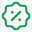
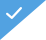
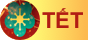
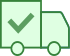
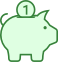
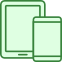
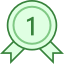
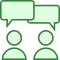
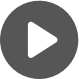
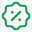

In [5]:
soup

In [6]:
divTag = soup.find_all("a", {"class": "main-contain"})
gaming_postfix = []
for tag in divTag:
    gaming_postfix.append(tag.get('href'))

In [7]:
gaming_postfix

['/laptop/apple-macbook-air-2020-mgn63saa',
 '/laptop/hp-240-g8-i3-6l1a1pa',
 '/laptop/acer-aspire-3-a315-57-379k-i3-nxkagsv001',
 '/laptop/apple-pro-16-m1-pro-2021-10-core-cpu',
 '/laptop/hp-15s-fq2716tu-i3-7c0x3pa',
 '/laptop/itel-spirit-1-i3-71006300035',
 '/laptop/asus-tuf-gaming-fx506lhb-i5-hn188w',
 '/laptop/acer-aspire-3-a315-58-54xf-i5-nxam0sv007',
 '/laptop/hp-pavilion-15-eg2082tu-i5-7c0q5pa',
 '/laptop/lenovo-ideapad-3-15iau7-i3-82rk005lvn',
 '/laptop/apple-macbook-air-m2-2022',
 '/laptop/asus-vivobook-x415ea-i3-ek2034w',
 '/laptop/lenovo-ideapad-1-15amn7-r5-82vg0061vn',
 '/laptop/msi-gaming-gf63-thin-11sc-i5-664vn',
 '/laptop/acer-aspire-3-a315-58-589k-i5-nxam0sv008',
 '/laptop/acer-aspire-7-gaming-a715-42g-r05g-r5-nhqaysv007',
 '/laptop/asus-vivobook-15-x1502za-i5-ej120w',
 '/laptop/apple-macbook-pro-13-inch-m2-2022',
 '/laptop/dell-vostro-3510-i5-p112f002bbl',
 '/laptop/lenovo-thinkbook-14-g3-acl-r5-21a200r0vn']

In [8]:
ccat_url = 'https://www.thegioididong.com'

In [9]:
all_url = []
for url in gaming_postfix:
    all_url.append(ccat_url + url)

In [10]:
all_url

['https://www.thegioididong.com/laptop/apple-macbook-air-2020-mgn63saa',
 'https://www.thegioididong.com/laptop/hp-240-g8-i3-6l1a1pa',
 'https://www.thegioididong.com/laptop/acer-aspire-3-a315-57-379k-i3-nxkagsv001',
 'https://www.thegioididong.com/laptop/apple-pro-16-m1-pro-2021-10-core-cpu',
 'https://www.thegioididong.com/laptop/hp-15s-fq2716tu-i3-7c0x3pa',
 'https://www.thegioididong.com/laptop/itel-spirit-1-i3-71006300035',
 'https://www.thegioididong.com/laptop/asus-tuf-gaming-fx506lhb-i5-hn188w',
 'https://www.thegioididong.com/laptop/acer-aspire-3-a315-58-54xf-i5-nxam0sv007',
 'https://www.thegioididong.com/laptop/hp-pavilion-15-eg2082tu-i5-7c0q5pa',
 'https://www.thegioididong.com/laptop/lenovo-ideapad-3-15iau7-i3-82rk005lvn',
 'https://www.thegioididong.com/laptop/apple-macbook-air-m2-2022',
 'https://www.thegioididong.com/laptop/asus-vivobook-x415ea-i3-ek2034w',
 'https://www.thegioididong.com/laptop/lenovo-ideapad-1-15amn7-r5-82vg0061vn',
 'https://www.thegioididong.com/lap

In [11]:
all_text = []

In [12]:
count = 0
for url in all_url:
    # usually 5 pages contain user reviews
    for i in range(1,5):
        driver = webdriver.ChromiumEdge(options=options)

        dg_url = url + f"/danh-gia?p={i}"
        try:
            driver.get(dg_url)
            time.sleep(2)
        except: 
            print("cannot load")
        soup = BeautifulSoup(driver.page_source)

        ar = np.array(soup.find_all("p",{'class','cmt-txt'}),dtype=object).flatten()
        func = lambda x: x.string
        try:
            getText = np.vectorize(func) (ar)
            getText = list(set(getText))
            all_text.extend(getText)
            print(getText)
        except:
            print('no comment')
            pass
    try:
        driver.close()  
    except:
        print("ERROR")
    print(count)
    count+=1


['máy ổn trong tầm giá nhân viên chi nhánh Nguyễn Tri Phương rất thân thiện', 'Good!', 'Rất tốt', 'Máy hoạt động trơn truôn, \nNhẹ gọn', 'Nhân viên dễ thương, tư vấn nhiệt tình. Máy dùng mượt. Rất tốt trong tầm giá', 'Rất ok', 'Rất mượt', 'Macbook cũ mà ngon như mới. Ram ít mà chạy còn nhanh hơn máy window ram nhiều.', 'sp chất lượng lắm nhe\U0001faf6🏻\U0001faf0🏻\U0001faf0🏻\U0001faf0🏻', 'Ok', 'Tốt', 'R ok ạ', 'Nhân viên niềm nở quan tâm khách hàng, hài lòng về cửa hàng cũng như chất lượng sản phẩm', 'Mọi thứ ok', 'Máy tốt', 'Lỗi bàn phím', 'Tôi đã mua macbook air M1 tại chi nhánh 95 Lê Quang Định TP HCM, sản phẩm rất ưng ý , nhân viên tư vấn rất nhiệt tình và rõ ràng. Nếu đem so với con air M2 thì tôi thấy M1 vẫn còn phát huy nhiều điểm mạnh của nó mặc dù tuổi đời đã 2 năm.', 'Ngon. Cám ơn các bạn đã phục vụ nhiệt tình', 'Kính macbook có dễ bị bể như thế không? Mình sử dụng chưa từng đóng máy khi chưa vệ sinh máy sau khi sử dụng hết, nhưng hôm nay đi dán lại máy thì thấy như thế này kh

In [15]:
all_text

['máy ổn trong tầm giá nhân viên chi nhánh Nguyễn Tri Phương rất thân thiện',
 'Good!',
 'Rất tốt',
 'Máy hoạt động trơn truôn, \nNhẹ gọn',
 'Nhân viên dễ thương, tư vấn nhiệt tình. Máy dùng mượt. Rất tốt trong tầm giá',
 'Rất ok',
 'Rất mượt',
 'Macbook cũ mà ngon như mới. Ram ít mà chạy còn nhanh hơn máy window ram nhiều.',
 'sp chất lượng lắm nhe\U0001faf6🏻\U0001faf0🏻\U0001faf0🏻\U0001faf0🏻',
 'Ok',
 'Tốt',
 'R ok ạ',
 'Nhân viên niềm nở quan tâm khách hàng, hài lòng về cửa hàng cũng như chất lượng sản phẩm',
 'Mọi thứ ok',
 'Máy tốt',
 'Lỗi bàn phím',
 'Tôi đã mua macbook air M1 tại chi nhánh 95 Lê Quang Định TP HCM, sản phẩm rất ưng ý , nhân viên tư vấn rất nhiệt tình và rõ ràng. Nếu đem so với con air M2 thì tôi thấy M1 vẫn còn phát huy nhiều điểm mạnh của nó mặc dù tuổi đời đã 2 năm.',
 'Ngon. Cám ơn các bạn đã phục vụ nhiệt tình',
 'Kính macbook có dễ bị bể như thế không? Mình sử dụng chưa từng đóng máy khi chưa vệ sinh máy sau khi sử dụng hết, nhưng hôm nay đi dán lại máy thì t

In [16]:
import pandas as pd
comment_df = pd.DataFrame({"Text":all_text})


In [17]:
comment_df

,Text
0,máy ổn trong tầm giá nhân viên chi nhánh Nguyễ...
1,Good!
2,Rất tốt
3,"Máy hoạt động trơn truôn, \nNhẹ gọn"
4,"Nhân viên dễ thương, tư vấn nhiệt tình. Máy dù..."
...,...
310,Tốt
311,"Máy tốt lắm ạ , nhân viên tư vấn rất nhiệt tình"
312,Ok
313,Tốt


In [ ]:
# comment_df.to_csv("data.csv",encoding='utf-8',index = False)